# T81-558: Applications of Deep Neural Networks
**Module 11: Natural Language Processing with Hugging Face**


# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


# Part 11.3: Hugging Face Datasets

The Hugging Face hub includes data sets useful for natural language processing (NLP). The Hugging Face library provides functions that allow you to navigate and obtain these data sets. When we access Hugging Face data sets, the data is in a format specific to Hugging Face. In this part, we will explore this format and see how to convert it to Pandas or TensorFlow data.

We begin by installing Hugging Face if needed. It is also essential to install Hugging Face datasets.



In [2]:
# HIDE OUTPUT
!pip install transformers
!pip install transformers[sentencepiece]
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installati

We begin by querying Hugging Face to obtain the total count and names of the data sets. This code obtains the total count and the names of the first five datasets.

In [3]:
from datasets import list_datasets

all_datasets = list_datasets()

print(f"Hugging Face hub currently contains {len(all_datasets)}")
print(f"datasets. The first 5 are:")
print("\n".join(all_datasets[:10]))


Hugging Face hub currently contains 19052
datasets. The first 5 are:
acronym_identification
ade_corpus_v2
adversarial_qa
aeslc
afrikaans_ner_corpus
ag_news
ai2_arc
air_dialogue
ajgt_twitter_ar
allegro_reviews


We begin by loading the emotion data set from the Hugging Face hub. [Emotion](https://huggingface.co/datasets/emotion) is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. [[Cite:saravia2018carer]](https://paperswithcode.com/paper/carer-contextualized-affect-representations) The following code loads the emotion data set from the Hugging Face hub.

In [4]:
from datasets import load_dataset

emotions = load_dataset("emotion")


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

A quick scan of the downloaded data set reveals its structure. In this case, Hugging Face already separated the data into training, validation, and test data sets. The training set consists of 16,000 observations, while the test and validation sets contain 2,000 observations. The dataset is a Python dictionary that includes a Dataset object for each of these three divisions. The datasets only contain two columns, the text and the emotion label for each text sample.

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

You can see a single observation from the training data set here. This observation includes both the text sample and the assigned emotion label. The label is a numeric index representing the assigned emotion.

In [6]:
emotions['train'][2]


{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}

We can display the labels in order of their index labels.

In [7]:
emotions['train'].features


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Hugging face can provide these data sets in a variety of formats. The following code receives the emotion data set as a Pandas data frame.

In [8]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions["train"][:]
df[:5]


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


We can use the Pandas "apply" function to add the textual label for each observation.

In [9]:
def label_it(row):
  return emotions["train"].features["label"].int2str(row)


df['label_name'] = df["label"].apply(label_it)
df[:5]


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


With the data in Pandas format and textually labeled, we can display a bar chart of the frequency of each of the emotions.

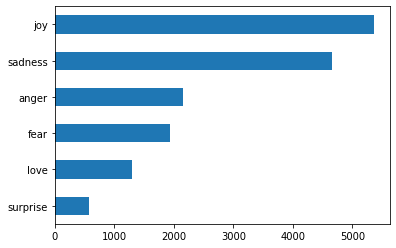

In [10]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.show()


Finally, we utilize Hugging Face tokenizers and data sets together. The following code tokenizes the entire emotion data set. You can see below that the code has transformed the training set into subword tokens that are now ready to be used in conjunction with a transformer for either inference or training.

In [11]:
from transformers import AutoTokenizer


def tokenize(rows):
    return tokenizer(rows['text'], padding=True, truncation=True)


model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

emotions.set_format(type=None)

encoded = tokenize(emotions["train"][:2])

print("**Input IDs**")
for a in encoded.input_ids:
    print(a)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

**Input IDs**
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]
